In [9]:
# Importation des bibliothèques 
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Téléchargement des ressources
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Augustin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Augustin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
import pandas as pd
import ast  # Module pour évaluer une chaîne JSON en tant que structure de données Python

# Charger le fichier CSV
chemin_du_fichier_csv = "../data/data_small.csv"
df = pd.read_csv(chemin_du_fichier_csv)

# Fonction pour extraire le premier nom de genre
def extraire_premier_genre(genre_str):
    genres_list = ast.literal_eval(genre_str)  # Convertir la chaîne JSON en liste de dictionnaires
    
    if genres_list:
        return ",".join([genre['name'] for genre in genres_list])
    else:
        return None

# Appliquer la fonction à la colonne "genres"
df["genres_str"] = df["genres"].apply(extraire_premier_genre)

# Sauvegarder le DataFrame modifié dans un nouveau fichier CSV
nouveau_chemin_du_fichier_csv = "nouveau_fichier.csv"
df.to_csv(nouveau_chemin_du_fichier_csv, index=False)

In [10]:
# Chargement du dataset
data = pd.read_csv('data.csv')

# Suppression des lignes sans synopsis ou genres
data.dropna(subset=['overview', 'genres_str'], inplace=True)
data.reset_index(drop=True, inplace=True)

# Filtrage des données (on garde seulement les colonnes qui nous intéressent)
sorted_data = data[['original_title', 'overview', 'genres_str']]
filtered_data = sorted_data[sorted_data['overview'].str.len() > 10]

In [11]:
# Tokenisation et lemmatisation avec NLTK
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
    print("Tokens avant lemmatisation :", tokens)
    print("Tokens après lemmatisation :", lemmatized_tokens)
    return lemmatized_tokens

In [12]:
# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(filtered_data['overview'], filtered_data['genres_str'], test_size=0.2, random_state=42)

In [13]:
# Entraîner le modèle Word2Vec seulement sur l'ensemble d'entraînement
train_tokens = X_train.apply(preprocess_text)
model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=1, workers=4)

Tokens avant lemmatisation : ['Fearing', 'the', 'actions', 'of', 'a', 'god-like', 'Super', 'Hero', 'left', 'unchecked', ',', 'Gotham', 'City', '’', 's', 'own', 'formidable', ',', 'forceful', 'vigilante', 'takes', 'on', 'Metropolis', '’', 's', 'most', 'revered', ',', 'modern-day', 'savior', ',', 'while', 'the', 'world', 'wrestles', 'with', 'what', 'sort', 'of', 'hero', 'it', 'really', 'needs', '.', 'And', 'with', 'Batman', 'and', 'Superman', 'at', 'war', 'with', 'one', 'another', ',', 'a', 'new', 'threat', 'quickly', 'arises', ',', 'putting', 'mankind', 'in', 'greater', 'danger', 'than', 'it', '’', 's', 'ever', 'known', 'before', '.']
Tokens après lemmatisation : ['fearing', 'the', 'action', 'of', 'a', 'god-like', 'super', 'hero', 'left', 'unchecked', ',', 'gotham', 'city', '’', 's', 'own', 'formidable', ',', 'forceful', 'vigilante', 'take', 'on', 'metropolis', '’', 's', 'most', 'revered', ',', 'modern-day', 'savior', ',', 'while', 'the', 'world', 'wrestle', 'with', 'what', 'sort', 'of'

In [14]:
# Transformer les données d'entraînement et de test en embeddings
X_train_embeddings = np.array([np.mean([model.wv[word] for word in doc if word in model.wv] or [np.zeros(model.vector_size)], axis=0) for doc in train_tokens])
X_test_embeddings = np.array([np.mean([model.wv[word] for word in doc if word in model.wv] or [np.zeros(model.vector_size)], axis=0) for doc in X_test.apply(preprocess_text)])

Tokens avant lemmatisation : ['The', 'lifelong', 'friendship', 'between', 'Rafe', 'McCawley', 'and', 'Danny', 'Walker', 'is', 'put', 'to', 'the', 'ultimate', 'test', 'when', 'the', 'two', 'ace', 'fighter', 'pilots', 'become', 'entangled', 'in', 'a', 'love', 'triangle', 'with', 'beautiful', 'Naval', 'nurse', 'Evelyn', 'Johnson', '.', 'But', 'the', 'rivalry', 'between', 'the', 'friends-turned-foes', 'is', 'immediately', 'put', 'on', 'hold', 'when', 'they', 'find', 'themselves', 'at', 'the', 'center', 'of', 'Japan', "'s", 'devastating', 'attack', 'on', 'Pearl', 'Harbor', 'on', 'Dec.', '7', ',', '1941', '.']
Tokens après lemmatisation : ['the', 'lifelong', 'friendship', 'between', 'rafe', 'mccawley', 'and', 'danny', 'walker', 'is', 'put', 'to', 'the', 'ultimate', 'test', 'when', 'the', 'two', 'ace', 'fighter', 'pilot', 'become', 'entangled', 'in', 'a', 'love', 'triangle', 'with', 'beautiful', 'naval', 'nurse', 'evelyn', 'johnson', '.', 'but', 'the', 'rivalry', 'between', 'the', 'friends-tu

In [15]:
# Entraîner le modèle de classification sur l'ensemble d'entraînement
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_embeddings, y_train)

# Genres prédits pour les 10 premiers films
print("Genres prédits pour les 10 premiers films de (ensemble d'entraînement) :", clf.predict(X_train_embeddings)[:10])

# Genres réels pour les 10 premiers films
print("Genres réels pour les 10 premiers films de (ensemble d'entraînement) :", y_train[:10].values)

Genres prédits pour les 10 premiers films de (ensemble d'entraînement) : ['Action,Adventure,Fantasy' 'Comedy,Science Fiction'
 'Comedy,Drama,History' 'Action,Mystery,Thriller'
 'Fantasy,Action,Adventure,Family,Comedy' 'Adventure,Drama,Family'
 'Crime,Drama,Comedy' 'Drama,Crime' 'Mystery,Thriller,Action'
 'Drama,Action,Adventure,Fantasy']
Genres réels pour les 10 premiers films de (ensemble d'entraînement) : ['Action,Adventure,Fantasy' 'Comedy,Science Fiction'
 'Comedy,Drama,History' 'Action,Mystery,Thriller'
 'Fantasy,Action,Adventure,Family,Comedy' 'Adventure,Drama,Family'
 'Crime,Drama,Comedy' 'Drama,Crime' 'Mystery,Thriller,Action'
 'Drama,Action,Adventure,Fantasy']


In [16]:
# Faire des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test_embeddings)

# Afficher les genres prédits pour les 10 premiers films
print("Genres prédits pour les 10 premiers films de (ensemble de test) :", y_pred[:10])

# Afficher les genres réels pour les 10 premiers films 
print("Genres réels pour les 10 premiers films de (ensemble de test) :", y_test[:10].values)

Genres prédits pour les 10 premiers films de (ensemble de test) : ['Science Fiction,Action,Adventure'
 'Science Fiction,Action,Drama,Thriller' 'Fantasy,Adventure,Family'
 'Adventure,Drama,Action' 'Science Fiction,Adventure,Mystery'
 'Comedy,Fantasy,Family' 'Animation,Adventure,Comedy,Family'
 'Action,Science Fiction' 'Science Fiction,Adventure,Mystery'
 'Adventure,Family,Fantasy']
Genres réels pour les 10 premiers films de (ensemble de test) : ['History,Romance,War' 'Adventure,Fantasy,Science Fiction'
 'Comedy,Romance' 'Drama,Comedy,Animation,Family'
 'Adventure,Animation,Family,Comedy' 'Comedy,Romance'
 'Adventure,Fantasy,Action,Science Fiction' 'Drama,Fantasy,Romance'
 'Family,Adventure,Drama,Fantasy' 'Adventure,Comedy,Drama,Fantasy']


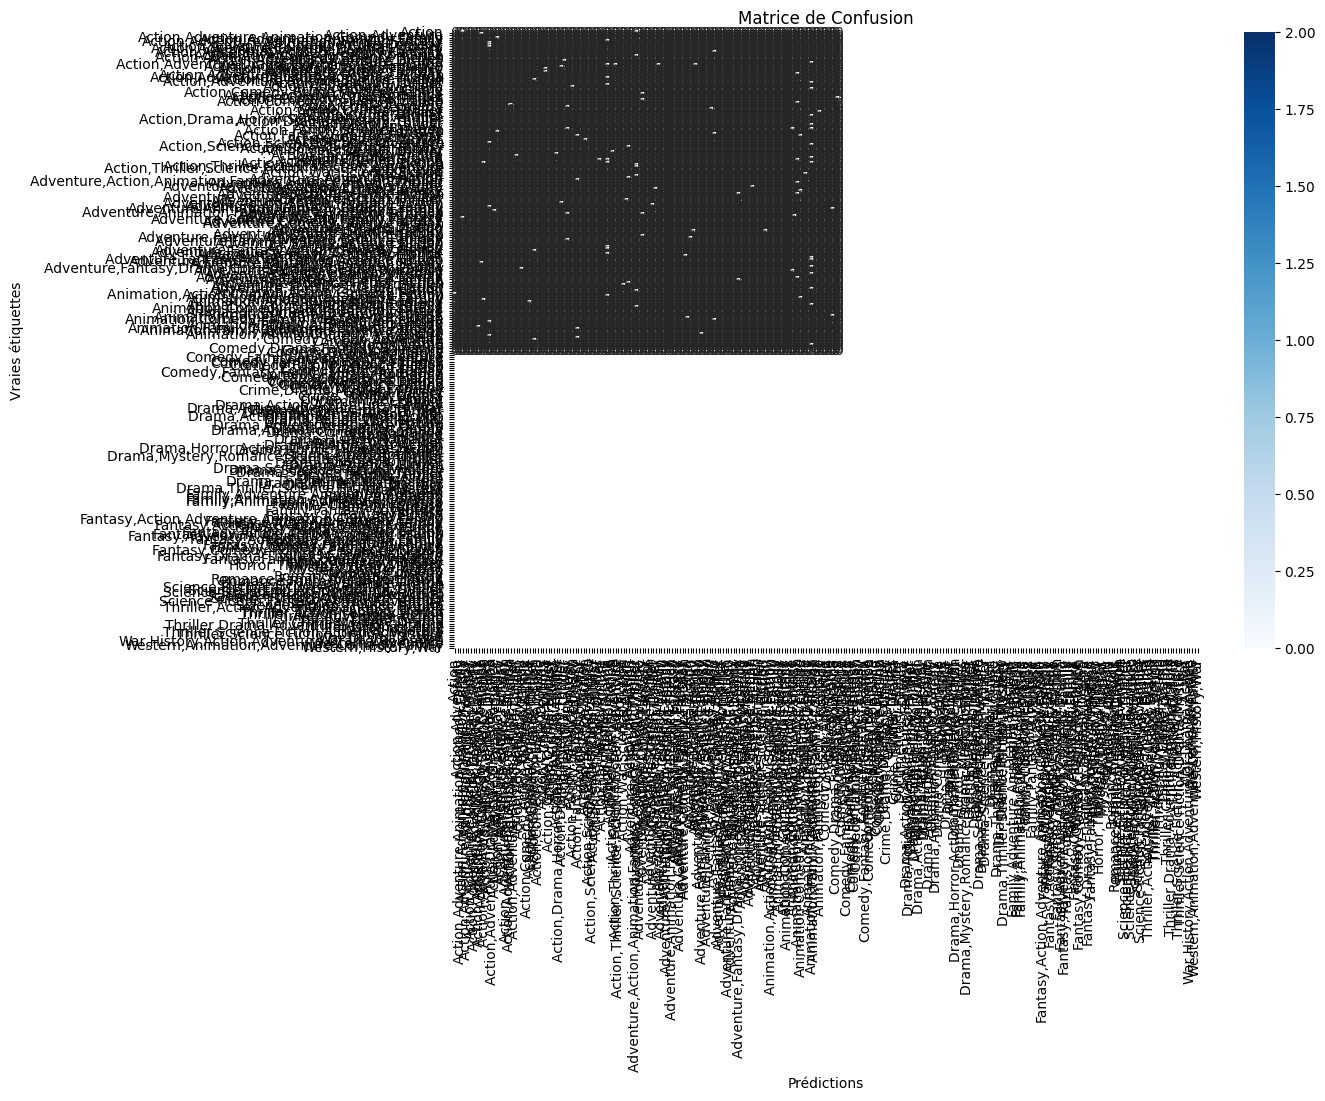

In [17]:
# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [ ]:
# Afficher le rapport de classification
class_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", class_report)

Rapport de classification :
                  precision    recall  f1-score   support

         Action       0.33      0.37      0.35       918
      Adventure       0.50      0.00      0.01       279
      Animation       0.00      0.00      0.00       213
         Comedy       0.37      0.41      0.39      1719
          Crime       0.22      0.01      0.01       357
    Documentary       0.48      0.54      0.51       645
          Drama       0.36      0.72      0.48      2293
         Family       0.00      0.00      0.00       114
        Fantasy       0.00      0.00      0.00       129
        Foreign       0.00      0.00      0.00        19
        History       0.00      0.00      0.00        68
         Horror       0.33      0.08      0.13       552
          Music       0.00      0.00      0.00       107
        Mystery       0.00      0.00      0.00       102
        Romance       0.00      0.00      0.00       238
Science Fiction       1.00      0.01      0.01       142
 

c:\Users\Augustin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Augustin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Augustin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [ ]:
# Faire des prédictions sur de nouvelles données
new_data = ["A spaceship travels to distant galaxies.", "A romantic drama set in Paris."]
processed_new_data = [preprocess_text(text) for text in new_data]
X_new = np.array([np.mean([model.wv[word] for word in doc if word in model.wv] or [np.zeros(model.vector_size)], axis=0) for doc in processed_new_data])

Tokens avant lemmatisation : ['A', 'spaceship', 'travels', 'to', 'distant', 'galaxies', '.']
Tokens après lemmatisation : ['a', 'spaceship', 'travel', 'to', 'distant', 'galaxy', '.']
Tokens avant lemmatisation : ['A', 'romantic', 'drama', 'set', 'in', 'Paris', '.']
Tokens après lemmatisation : ['a', 'romantic', 'drama', 'set', 'in', 'paris', '.']


In [ ]:
# Prédire les genres des nouvelles données
predicted_genres = clf.predict(X_new)
print("Genres prédits pour les nouvelles données :", predicted_genres)

Genres prédits pour les nouvelles données : ['Comedy' 'Drama']
